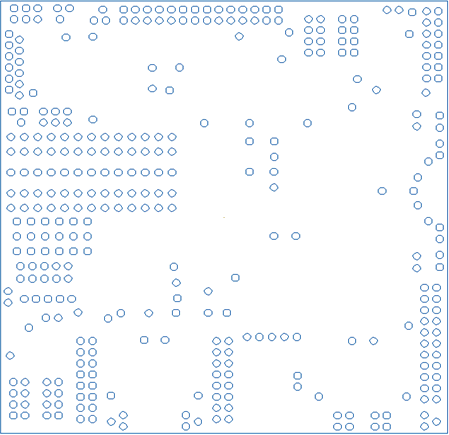

In [4]:
from IPython.display import Image
Image(filename='Bogi_035305.PNG', width=600)

In [12]:
import cv2
import numpy as np

img_path = 'Bogi_035305.PNG'

# 導入圖片
img = cv2.imread(img_path)
# img = cv2.imread(img_path, cv2.CV_8UC1)
# print(img)

In [13]:
# 灰階
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化 cv2.threshold(img, 分類門檻, 最大灰階, 二值化類型)
# cv2.THRESH_BINARY: 大於門檻變成最大，其餘 0
# cv2.THRESH_BINARY_INV: 大於門檻變成 0，其餘最大
# cv2.THRESH_TURNC: 大於門檻變成門檻值，其餘不變
# cv2.THRESH_TOZERO: 小於門檻變成 0，大於門檻不變
# cv2.THRESH_TOZERO_INV: 大於門檻變成 0，小於門檻不變
# 回傳值, 回傳影像
ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

In [14]:
# 聯通區域
# 輪廓層級 hierarchy : [Next, Previous, First_Child, Parent]
# Next: 同層級下一個輪廓，若無 = -1
# Previous: 同層級上一個輪廓，若無 = -1
# First_Child: 第一個孩子輪廓，若無 = -1
# Parent: 父親輪廓，若無 = -1
#      RETR_LIST: 獲取所有輪廓，但不建立父子關係 (hierarchy 中 First_Child, Parent 皆為 -1)
#      RETR_TREE: 獲取所有輪廓，並建立完整的家族關係
# 新版只返回 兩個參數
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 輪廓面積
areas = []
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    areas.append(area)
    print(f'輪廓 {i} 面積為 {area}')
    
area_avg = np.average(areas)
print('輪廓平均面積: ', area_avg)

輪廓 0 面積為 194430.0
輪廓 1 面積為 2.0
輪廓 2 面積為 2.0
輪廓 3 面積為 2.0
輪廓 4 面積為 2.0
輪廓 5 面積為 2.0
輪廓 6 面積為 2.0
輪廓 7 面積為 4.0
輪廓 8 面積為 4.0
輪廓 9 面積為 2.0
輪廓 10 面積為 2.0
輪廓 11 面積為 2.0
輪廓 12 面積為 2.0
輪廓 13 面積為 2.0
輪廓 14 面積為 2.0
輪廓 15 面積為 2.0
輪廓 16 面積為 2.0
輪廓 17 面積為 2.0
輪廓 18 面積為 2.0
輪廓 19 面積為 2.0
輪廓 20 面積為 2.0
輪廓 21 面積為 2.0
輪廓 22 面積為 2.0
輪廓 23 面積為 2.0
輪廓 24 面積為 2.0
輪廓 25 面積為 2.0
輪廓 26 面積為 2.0
輪廓 27 面積為 6.0
輪廓 28 面積為 6.0
輪廓 29 面積為 2.0
輪廓 30 面積為 2.0
輪廓 31 面積為 2.0
輪廓 32 面積為 2.0
輪廓 33 面積為 2.0
輪廓 34 面積為 2.0
輪廓 35 面積為 2.0
輪廓 36 面積為 2.0
輪廓 37 面積為 2.0
輪廓 38 面積為 2.0
輪廓 39 面積為 2.0
輪廓 40 面積為 2.0
輪廓 41 面積為 2.0
輪廓 42 面積為 4.0
輪廓 43 面積為 4.0
輪廓 44 面積為 2.0
輪廓 45 面積為 2.0
輪廓 46 面積為 2.0
輪廓 47 面積為 2.0
輪廓 48 面積為 2.0
輪廓 49 面積為 4.0
輪廓 50 面積為 2.0
輪廓 51 面積為 4.0
輪廓 52 面積為 2.0
輪廓 53 面積為 4.0
輪廓 54 面積為 4.0
輪廓 55 面積為 2.0
輪廓 56 面積為 2.0
輪廓 57 面積為 4.0
輪廓 58 面積為 2.0
輪廓 59 面積為 4.0
輪廓 60 面積為 4.0
輪廓 61 面積為 6.0
輪廓 62 面積為 6.0
輪廓 63 面積為 2.0
輪廓 64 面積為 2.0
輪廓 65 面積為 4.0
輪廓 66 面積為 4.0
輪廓 67 面積為 2.0
輪廓 68 面積為 2.0
輪廓 69 面積為 4.0
輪廓 70 面積為 2.0
輪廓 71 面積為 4

In [15]:
# 篩選超過平均面積的輪廓
img_contours = []
for i in range(len(contours)):
    img_temp = np.zeros(img.shape, np.uint8)
    img_contours.append(img_temp)

    area = cv2.contourArea(contours[i], False)
    if area > area_avg:
        print(f'輪廓 {i} 的面積是 {area}')
        # drawContours(img, contours, contourldx, color, thickness)
        cv2.drawContours(img_contours[i], contours, i, (0, 0, 255), 5)
        cv2.imshow(f'contours {i}', img_contours[i])

# 顯示結果
cv2.imshow('img_bin', img_bin)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

輪廓 0 的面積是 194430.0


In [16]:
# 計算面積
print(f'Total ratio: {np.sum(areas[1:]) / areas[0] * 100:.2f}%')

Total ratio: 0.55%


In [ ]:
# 切割圖片
from PIL import Image
dir = 'path.jpg'
image = Image.open(dir)
img = image.convert('RGB')
w = img[0]/3
h = img[1]/3

for i in range(0, 4):
    for j in range(0, 4):
        img_1 = img.crop([i*w, j*h, (i+1)*w, (j+1)*h])
        img_1.save(f'./{i+1}_{j+1}.jpg')


img_1 = img.crop([0, 0, w, h])
img_1.save('./' + '1_1' + '.jpg)
img_2 = img.crop([0, h, w, 2*h])
img_2.save('./' + '2' + '.jpg)
img_3 = img.crop([0, 2*h, w, 3*h])
img_3.save('./' + '3' + '.jpg)